In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
# from sklearn.preprocessing import Normailzer
import seaborn as sns


In [2]:
df=pd.read_csv('new_dataset.csv')

In [216]:
df.tail()

,Unnamed: 0,cc_num,amt,zip,city_pop,trans_num,unix_time,is_fraud
1296670,1296670,30263540414123,15.56,84735,258,344658,1371816728,0
1296671,1296671,6011149206456997,51.70,21790,100,199896,1371816739,0
1296672,1296672,3514865930894695,105.93,88325,899,366013,1371816752,0
1296673,1296673,2720012583106919,74.90,57756,1126,1086299,1371816816,0
1296674,1296674,4292902571056973207,4.30,59871,218,726622,1371816817,0


In [124]:
#count all the values in the class column
df['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [208]:
fraud_values = df[df['is_fraud'] == 1]
print(fraud_values)

        

         Unnamed: 0            cc_num      amt    zip  city_pop  trans_num  \
2449           2449     4613314721966   281.06  28611       885    1178659   
2472           2472   340187018810220    11.52  78208   1595797     954913   
2523           2523   340187018810220   276.31  78208   1595797     940333   
2546           2546     4613314721966     7.03  28611       885     291079   
2553           2553   340187018810220   275.73  78208   1595797     609438   
...             ...               ...      ...    ...       ...        ...   
1295399     1295399  3524574586339330   977.01  32960    105638     852116   
1295491     1295491  3524574586339330  1210.91  32960    105638    1252988   
1295532     1295532  4005676619255478    10.24  70726     71335     814134   
1295666     1295666  3560725013359375    21.69  79759        23    1107480   
1295733     1295733  4005676619255478    10.20  70726     71335      61427   

          unix_time  is_fraud  
2449     1325466397         1  

In [3]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['trans_num'] = encoder.fit_transform(df['trans_num'])




In [ ]:
import pickle

# Save the encoder object into a pickle file
with open('encoder.pkl', 'wb') as file:
    pickle.dump(encoder, file)


In [225]:
ans=encoder.transform(['f75b35bed13b9e692f170dba45a15b21'])
print(ans)

[1252988]


C:\Users\basim\AppData\Local\Temp\ipykernel_8100\2547128853.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_fraud', data=df, palette='hls')


<Axes: xlabel='is_fraud', ylabel='count'>

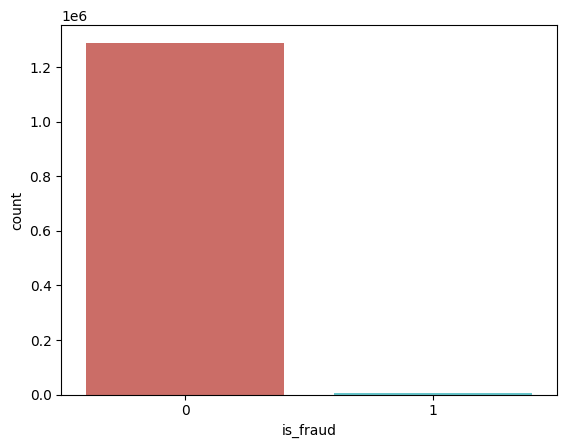

In [126]:
sns.countplot(x='is_fraud', data=df, palette='hls')

In [176]:
# scaler=MinMaxScaler()  


In [198]:
X=df.drop(['is_fraud'], axis=1)
y=df['is_fraud']


In [199]:
X


,Unnamed: 0,cc_num,amt,zip,city_pop,trans_num,unix_time
0,0,2703186189652095,4.97,28654,3495,56438,1325376018
1,1,630423337322,107.23,99160,149,159395,1325376044
2,2,38859492057661,220.11,83252,4154,818703,1325376051
3,3,3534093764340240,45.00,59632,1939,544575,1325376076
4,4,375534208663984,41.96,24433,99,831111,1325376186
...,...,...,...,...,...,...,...
1296670,1296670,30263540414123,15.56,84735,258,344658,1371816728
1296671,1296671,6011149206456997,51.70,21790,100,199896,1371816739
1296672,1296672,3514865930894695,105.93,88325,899,366013,1371816752
1296673,1296673,2720012583106919,74.90,57756,1126,1086299,1371816816


In [200]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [201]:
df_normalized=pd.DataFrame(X, columns=df.columns[:-1])

In [202]:
df_normalized.head()

    

,Unnamed: 0,cc_num,amt,zip,city_pop,trans_num,unix_time
0,0.000000e+00,5.414540e-04,0.000137,0.278069,0.001194,0.043525,0.000000e+00
1,7.712039e-07,1.141762e-07,0.003670,0.993677,0.000043,0.122926,5.598526e-07
2,1.542408e-06,7.771712e-06,0.007569,0.832217,0.001421,0.631387,7.105821e-07
3,2.313612e-06,7.078903e-04,0.001520,0.592483,0.000659,0.419978,1.248902e-06
4,3.084815e-06,7.520988e-05,0.001415,0.235227,0.000026,0.640956,3.617509e-06


In [170]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)



In [171]:
X_resampled

,Unnamed: 0,cc_num,amt,zip,city_pop,trans_num,unix_time
0,0.000000e+00,5.414540e-04,0.000137,0.278069,0.001194,0.043525,0.000000e+00
1,7.712039e-07,1.141762e-07,0.003670,0.993677,0.000043,0.122926,5.598526e-07
2,1.542408e-06,7.771712e-06,0.007569,0.832217,0.001421,0.631387,7.105821e-07
3,2.313612e-06,7.078903e-04,0.001520,0.592483,0.000659,0.419978,1.248902e-06
4,3.084815e-06,7.520988e-05,0.001415,0.235227,0.000026,0.640956,3.617509e-06
...,...,...,...,...,...,...,...
2578333,2.198563e-01,5.449086e-04,0.011050,0.030753,0.001101,0.985479,2.612892e-01
2578334,1.048961e-01,1.204061e-03,0.017708,0.941457,0.037128,0.323254,1.396446e-01
2578335,7.010166e-01,9.445943e-01,0.000190,0.744737,0.000154,0.361066,6.751874e-01
2578336,6.287440e-01,1.050122e-07,0.009499,0.581308,0.000098,0.506976,6.362908e-01


In [172]:
y_resampled

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
2578333    1.0
2578334    1.0
2578335    1.0
2578336    1.0
2578337    1.0
Name: is_fraud, Length: 2578338, dtype: float64

In [203]:
import pickle

# Save the MinMaxScaler object into a pickle file
with open('min_max_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)


In [144]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [145]:
X_train.count()

Unnamed: 0    1804836
cc_num        1804836
amt           1804836
zip           1804836
city_pop      1804836
trans_num     1804836
unix_time     1804836
dtype: int64

In [146]:
# Define the model architecture
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model



In [149]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32 ,validation_split=0.2,)


Epoch 1/10
45121/45121 [==============================] - 79s 2ms/step - loss: 0.2705 - accuracy: 0.8783 - val_loss: 0.2604 - val_accuracy: 0.8816
Epoch 2/10
45121/45121 [==============================] - 67s 1ms/step - loss: 0.2601 - accuracy: 0.8837 - val_loss: 0.2479 - val_accuracy: 0.8870
Epoch 3/10
45121/45121 [==============================] - 67s 1ms/step - loss: 0.2511 - accuracy: 0.8878 - val_loss: 0.2369 - val_accuracy: 0.8941
Epoch 4/10
45121/45121 [==============================] - 69s 2ms/step - loss: 0.2438 - accuracy: 0.8917 - val_loss: 0.2740 - val_accuracy: 0.8800
Epoch 5/10
45121/45121 [==============================] - 67s 1ms/step - loss: 0.2384 - accuracy: 0.8941 - val_loss: 0.2315 - val_accuracy: 0.8978
Epoch 6/10
45121/45121 [==============================] - 67s 1ms/step - loss: 0.2329 - accuracy: 0.8967 - val_loss: 0.2236 - val_accuracy: 0.9029
Epoch 7/10
45121/45121 [==============================] - 67s 1ms/step - loss: 0.2282 - accuracy: 0.8986 - val_loss: 0

In [212]:
from keras.models import load_model

# Save the model
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
# Load the model
loaded_model = load_model('my_model.h5')

c:\Users\basim\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


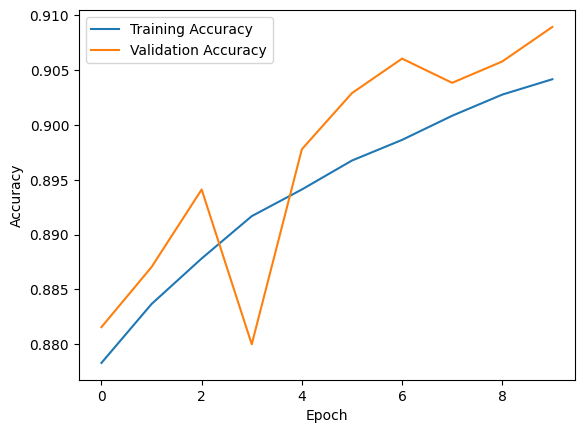

In [151]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


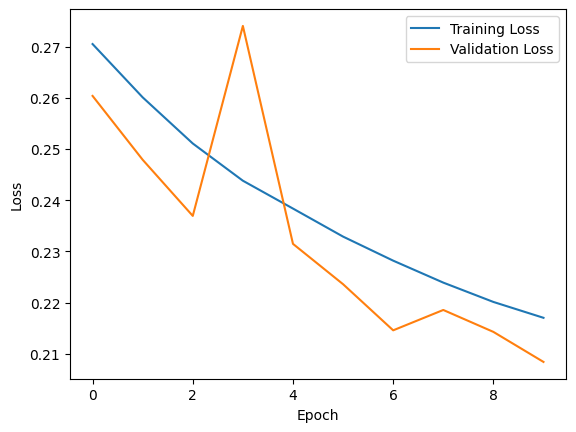

In [152]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [154]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)


24172/24172 [==============================] - 26s 1ms/step - loss: 0.2096 - accuracy: 0.9074
Test Loss: 0.20963217318058014
Test Accuracy: 0.9073719382286072


In [226]:
# Take input from the user
input_data = []
with open('min_max_scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

# Prompt the user for input
for feature in df_normalized.columns:
    value = input(f"Enter the value for {feature}: ")
    input_data.append(float(value))

# Convert the input data into a numpy array
input_data = np.array(input_data).reshape(1, -1)

# Scale the input data using the same scaler used for training
input_data_scaled = scaler.transform(input_data)

# Make predictions using the model
prediction = loaded_model.predict(input_data_scaled)
if(prediction[0][0] > 0.5):
    print("Fraudulent Transaction")
else:
    print("Legitimate Transaction")
    
# Print the predicted value
print(f"The predicted value is: {prediction[0][0]}")



1/1 [==============================] - 0s 27ms/step
Fraudulent Transaction
The predicted value is: 0.9645624160766602


c:\Users\basim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
# 1295274,6564459919350820,725.6,53803,1306,4c8f2df49533aec89d39202e11c4fdb4,1371771626,1
# 1295314,3560725013359375,15.87,79759,23,4d41749b3c465a255da56e54608645fd,1371773103,1
# 1295315,3524574586339330,9.18,32960,105638,1e924fbe61d8fbaf6ea24b671c97709b,1371773229,1
# 1295399,3524574586339330,977.01,32960,105638,a83b093f0c1d9068fa0089f7c722615f,1371776408,1
# 1295491,3524574586339330,1210.91,32960,105638,f75b35bed13b9e692f170dba45a15b21,1371779615,1
# 876925,180040131978916,1106.9,16428,12478,bd8ca1d75feb6511bb1a7b62b579dab5,1356116402,1
# 1295255,3560725013359375,1063.03,79759,23,88d038dce3add03666ab117a9d7225e6,1371770992,1
# 1295256,180094419304907,145.75,92585,54287,f8740523638b2502c78ed7e26e2407bd,1371770998,0
# 1295257,3573030041201292,222.69,84002,302,b72184f055fce8de222ecf5e9d569fe3,1371771065,1